In [36]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [37]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"using device :{device}")

using device :cuda


In [38]:
import kagglehub
path = kagglehub.dataset_download("zalando-research/fashionmnist")

Using Colab cache for faster access to the 'fashionmnist' dataset.


In [39]:
df = pd.read_csv('/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#setting seed for same result everywhere
torch.manual_seed(42)

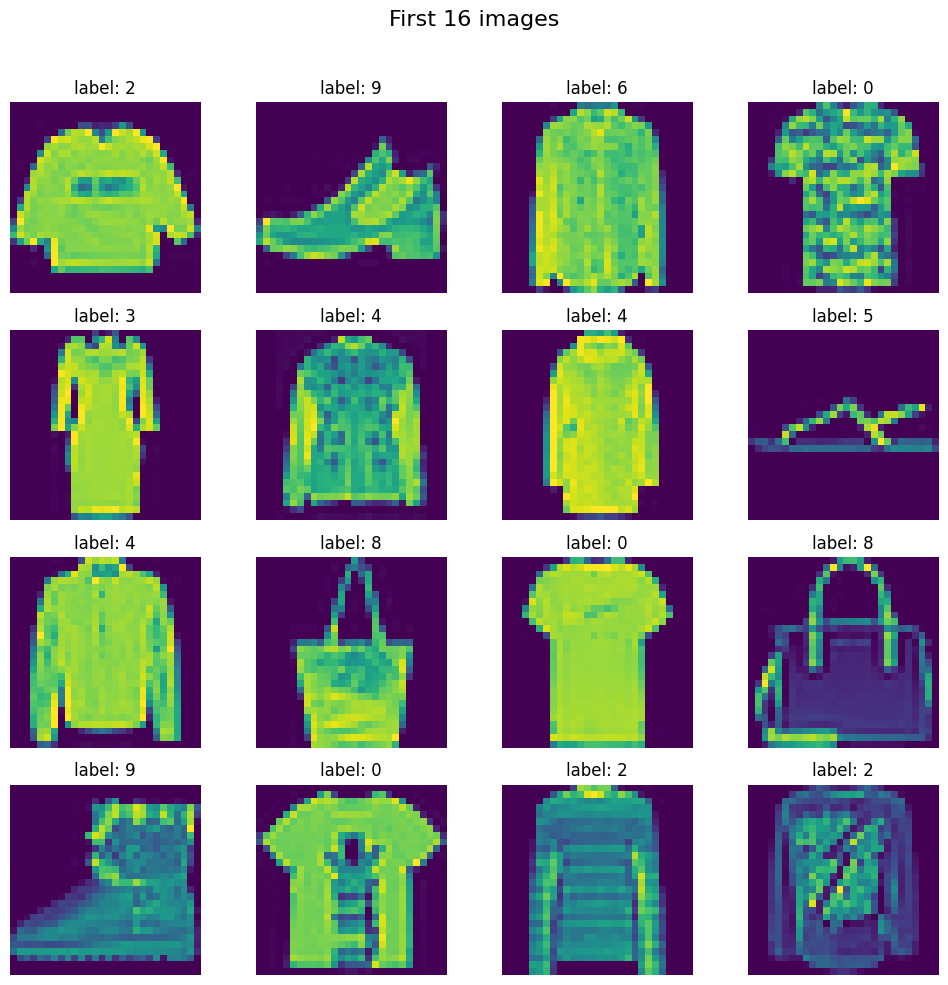

In [41]:
#creating a 4 x 4 grid of images
fig, axes= plt.subplots(4,4 ,figsize=(10,10))
fig.suptitle("First 16 images", fontsize=16)  #super title

#first 16 images
for i, ax in enumerate(axes.flat):  #converting 2D into 1D
  img=df.iloc[i,1:].values.reshape(28,28)  #column 0=label so better eliminating it
  ax.imshow(img)
  ax.axis('off')  #removing x-axis and y axis
  ax.set_title(f"label: {df.iloc[i,0]}")


plt.tight_layout(rect=[0,0,1,0.96])  #for preventing overlapping
plt.show()

In [42]:
#train test split
X=df.iloc[:,1:].values #EVERY COLUMN
y=df.iloc[:,0].values

In [43]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [44]:
#scaling features
X_train=X_train/255.0
X_test=X_test/255.0

In [45]:

X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

In [46]:
#creating CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features,labels):
    self.features=torch.tensor(features, dtype=torch.float32)
    self.labels=torch.tensor(labels, dtype=torch.long)


  def __len__(self):

    return len(self.features)

  def __getitem__(self,idx):

    return self.features[idx], self.labels[idx]


In [47]:
train_dataset=CustomDataset(X_train, y_train)
test_dataset=CustomDataset(X_test, y_test)

In [48]:
len(train_dataset)

48000

In [49]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [50]:
train_loader=DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True) # reducing time from pagememory to pin memory directly mentioning oin_memory
test_loader=DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True) #no shuffling as it'll cause problem in accuracy

In [51]:
#NN class

class NN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    #architecture
    self.model= nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        #applying dropout
        nn.Dropout(p=0.3),
        nn.Linear(128,64),
        #applying batch norm
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64,10)
            )  #no need to explicity define sofmax


  def forward(self,x):

    return self.model(x)

In [52]:
epochs=100
learning_rate=0.1

In [53]:
#instantiating the model
model=NN(X_train.shape[1])
model=model.to(device)

#loss fn
criterion=nn.CrossEntropyLoss()

#optimizer
optimizer=optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

In [54]:
len(train_loader)

1500

In [55]:
#trainign
for epoch in range(epochs):

  total_epoch_loss=0

  for batch_features, batch_labels in train_loader:



        #to gpu
        batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)

        #forward pass
        out=model(batch_features)

        #loss calculation

        loss=criterion(out,batch_labels)

        #backpropagation
        optimizer.zero_grad() # clearing gradients
        loss.backward()


        #upate grads
        optimizer.step()

        #after every epoch , loss=

        total_epoch_loss = total_epoch_loss + loss.item()


  avg_loss=total_epoch_loss/len(train_loader)
  print(f"Epoch:{epoch+1}, loss:{avg_loss}")





Epoch:1, loss:0.6249084657629331
Epoch:2, loss:0.49199690653880435
Epoch:3, loss:0.45562089485426743
Epoch:4, loss:0.43380642544229825
Epoch:5, loss:0.41715061584611735
Epoch:6, loss:0.40564093277355034
Epoch:7, loss:0.3941608931571245
Epoch:8, loss:0.38580174928406874
Epoch:9, loss:0.3743983890265226
Epoch:10, loss:0.3725726637095213
Epoch:11, loss:0.36783315147956214
Epoch:12, loss:0.3572052289446195
Epoch:13, loss:0.35052060889204345
Epoch:14, loss:0.3449219484726588
Epoch:15, loss:0.34472562207778296
Epoch:16, loss:0.33732124184072015
Epoch:17, loss:0.3344038988550504
Epoch:18, loss:0.3302020480086406
Epoch:19, loss:0.33063985937833784
Epoch:20, loss:0.3262277270356814
Epoch:21, loss:0.3208496819138527
Epoch:22, loss:0.3183093272894621
Epoch:23, loss:0.3225850373158852
Epoch:24, loss:0.31459670132398604
Epoch:25, loss:0.31343053522954384
Epoch:26, loss:0.31424527982374034
Epoch:27, loss:0.3107087447295586
Epoch:28, loss:0.30905606236557165
Epoch:29, loss:0.30456138551731904
Epoch:3

In [56]:
# setting model to eval mode

model.eval()


NN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [57]:
#evaluation

total=0
correct=0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:
     #to gpu
     batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)

     out=model(batch_features)

     _, predicted = torch.max(out,1)

     total= total+ batch_labels.shape[0]

     correct= correct + ( predicted == batch_labels).sum().item()

print(correct/total)






0.9325416666666667


In [58]:
#overfitting problem

In [59]:
#evaluation

total=0
correct=0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:
     #to gpu
     batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)

     out=model(batch_features)

     _, predicted = torch.max(out,1)

     total= total+ batch_labels.shape[0]

     correct= correct + ( predicted == batch_labels).sum().item()

print(correct/total)






0.88325
